In [1]:
import numpy as np
import pandas as pd

# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

In [2]:
dtype = {'DayOfWeek': np.uint8, 'DayofMonth': np.uint8, 'Month': np.uint8 , 'Cancelled': np.uint8, 
         'Year': np.uint16, 'FlightNum': np.uint16 , 'Distance': np.uint16, 
         'UniqueCarrier': str, 'CancellationCode': str, 'Origin': str, 'Dest': str,
         'ArrDelay': np.float16, 'DepDelay': np.float16, 'CarrierDelay': np.float16,
         'WeatherDelay': np.float16, 'NASDelay': np.float16, 'SecurityDelay': np.float16,
         'LateAircraftDelay': np.float16, 'DepTime': np.float16}

In [4]:
%%time
# change the path if needed
path = '../../Downloads/2008.csv.bz2'
flights_df = pd.read_csv(path, usecols=dtype.keys(), dtype=dtype)

CPU times: user 1min 17s, sys: 868 ms, total: 1min 18s
Wall time: 1min 22s


In [4]:
print(flights_df.shape)
print(flights_df.columns)

(7009728, 19)
Index([u'Year', u'Month', u'DayofMonth', u'DayOfWeek', u'DepTime',
       u'UniqueCarrier', u'FlightNum', u'ArrDelay', u'DepDelay', u'Origin',
       u'Dest', u'Distance', u'Cancelled', u'CancellationCode',
       u'CarrierDelay', u'WeatherDelay', u'NASDelay', u'SecurityDelay',
       u'LateAircraftDelay'],
      dtype='object')


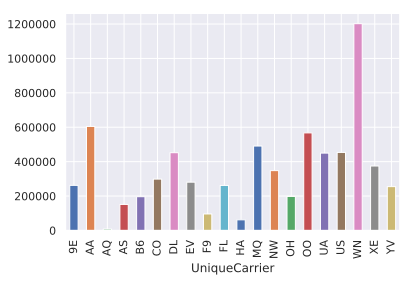

In [5]:
flights_df.groupby('UniqueCarrier').size().plot(kind='bar');

In [12]:
#Find top-10 carriers in terms of the number of completed flights (UniqueCarrier column)?

flights_df.groupby('UniqueCarrier').size().sort_values(ascending=False).iloc[:10]
#EV

UniqueCarrier
WN    1201754
AA     604885
OO     567159
MQ     490693
US     453589
DL     451931
UA     449515
XE     374510
NW     347652
CO     298455
dtype: int64

In [14]:
#What is the most frequent reason for flight cancellation?
flights_df.groupby('CancellationCode').size()
#B=Weather

CancellationCode
A    54330
B    54904
C    28188
D       12
dtype: int64

In [19]:
# Which route is the most frequent, in terms of the number of flights?

#(Take a look at 'Origin' and 'Dest' features. Consider A->B and B->A directions as different routes)

flights_df.groupby(['Origin','Dest']).size().sort_values(ascending=False)
#San-Francisco – Los-Angeles

Origin  Dest
SFO     LAX     13788
LAX     SFO     13390
OGG     HNL     12383
LGA     BOS     12035
BOS     LGA     12029
HNL     OGG     12014
LAX     LAS     11773
LAS     LAX     11729
LAX     SAN     11257
SAN     LAX     11224
DCA     LGA     11102
LGA     DCA     11063
        ORD     10862
ORD     LGA     10770
HNL     LIH     10769
LAS     PHX     10626
LGA     ATL     10507
ATL     LGA     10506
LIH     HNL     10407
PHX     LAS     10337
        LAX      9992
LAX     PHX      9897
DFW     ATL      9849
ATL     DFW      9847
DAL     HOU      9790
HOU     DAL      9766
ORD     MSP      9688
ATL     MCO      9613
MCO     ATL      9611
MSP     ORD      9356
                ...  
MCI     LNK         1
        MGM         1
SGF     FSD         1
BTR     MSY         1
SFO     SJC         1
AVP     HPN         1
SJC     BFL         1
LNK     ABE         1
LMT     MFR         1
LIT     SAT         1
PSP     ONT         1
        TWF         1
ATW     CHS         1
        DSM        

In [57]:
#Find top-5 delayed routes (count how many times they were delayed on departure). From all flights on these 5 routes, count all flights with weather conditions contributing to a delay.
x= flights_df[(flights_df['DepDelay']>0)]


In [85]:
x.groupby(['Origin','Dest']).size().sort_values(ascending=False).head()

Origin  Dest
LAX     SFO     6253
DAL     HOU     5742
SFO     LAX     5322
ORD     LGA     5311
HOU     DAL     5288
dtype: int64

In [88]:
y = x[((x['Dest']=='SFO')&(x['Origin']=='LAX'))|((x['Dest']=='LAX')&(x['Origin']=='SFO'))|((x['Dest']=='HOU')&(x['Origin']=='DAL'))|((x['Dest']=='LGA')&(x['Origin']=='ORD'))|((x['Dest']=='DAL')&(x['Origin']=='HOU'))]

In [90]:
y[y['WeatherDelay']>0].count()

Year                 668
Month                668
DayofMonth           668
DayOfWeek            668
DepTime              668
UniqueCarrier        668
FlightNum            668
ArrDelay             668
DepDelay             668
Origin               668
Dest                 668
Distance             668
Cancelled            668
CancellationCode       0
CarrierDelay         668
WeatherDelay         668
NASDelay             668
SecurityDelay        668
LateAircraftDelay    668
dtype: int64

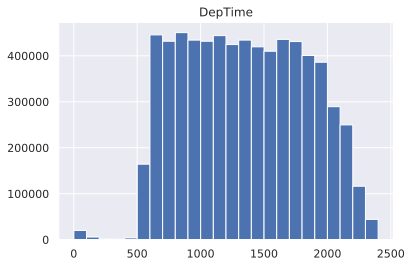

In [18]:
#Examine the hourly distribution of departure times. For that, create a new series from DepTime, removing missing values.
flights_df.hist('DepTime', bins=24);

In [5]:
#Adding Date Column
flights_df['Date'] = pd.to_datetime(flights_df.rename(columns={'DayofMonth': 'Day'})[['Year', 'Month', 'Day']])

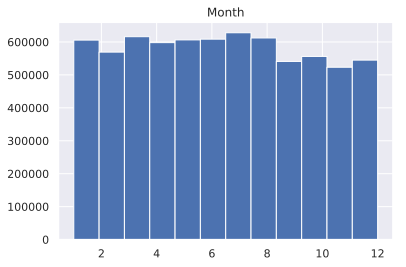

In [41]:
#Show how the number of flights changes through time (on the daily/weekly/monthly basis) and interpret the findings.
flights_df.hist('Month', bins=12);
flights_df.hist('DepTime', bins=24);

In [14]:
#Which month has the greatest number of cancellations due to Carrier(also find name of Carrier)
flights_df[(flights_df['Month']==4)&(flights_df['CancellationCode']=='A')].groupby(['UniqueCarrier']).size().sort_values(ascending=False).head()
#April
#AA

UniqueCarrier
AA    3696
WN     533
UA     494
YV     454
9E     391
dtype: int64

CancellationCode
A    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
B    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
C    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
D    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

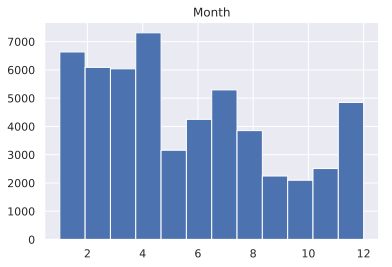

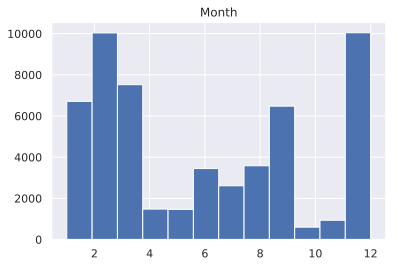

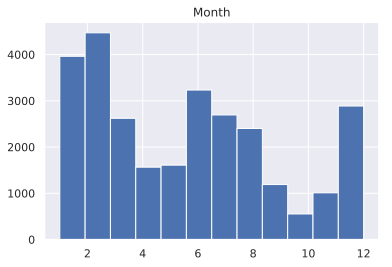

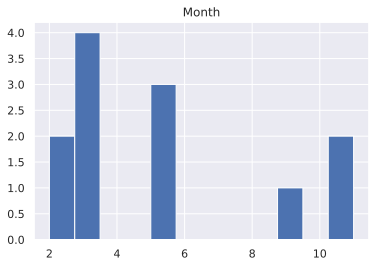

In [15]:
#Examine the distribution of cancellation reasons with time. Make a bar plot of cancellation reasons aggregated by months.
flights_df.groupby(['CancellationCode']).hist('Month',bins=12)
#April's top cancellation reason is carriers.
#December has the highest rate of cancellations due to weather.

In [38]:
#Examine median arrival and departure delays (in time) by carrier. Which carrier has the lowest median delay time for both arrivals and departures? Leave only non-negative values of delay times ('ArrDelay', 'DepDelay'). Boxplots can be helpful in this exercise, as well as it might be a good idea to remove outliers in order to build nice graphs. You can exclude delay time values higher than a corresponding .95 percentile.
m = flights_df[(flights_df['ArrDelay']>=0.0)&(flights_df['DepDelay']>=0.0)&(flights_df['ArrDelay']<=75.0)]#75 beyond were outliers
m.groupby(['UniqueCarrier'])['ArrDelay'].median()
#t.median()
#Remove Outliers
#AQ
m.groupby(['UniqueCarrier']).head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,WN,378,11.0,25.0,IND,JAX,688,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2008,1,3,4,1937.0,WN,509,57.0,67.0,IND,LAS,1591,0,NaN,10.0,0.0,0.0,0.0,47.0
94055,2008,1,5,6,1009.0,XE,2815,5.0,9.0,ROC,EWR,246,0,NaN,NaN,NaN,NaN,NaN,NaN
94059,2008,1,8,2,1711.0,XE,1226,46.0,71.0,ORD,EWR,719,0,NaN,0.0,0.0,2.0,0.0,44.0
94061,2008,1,15,2,1400.0,XE,2401,12.0,0.0,MHT,CLE,544,0,NaN,NaN,NaN,NaN,NaN,NaN
94065,2008,1,2,3,1252.0,XE,2667,29.0,29.0,MCI,IAH,643,0,NaN,6.0,0.0,0.0,0.0,23.0
94066,2008,1,19,6,1613.0,XE,2558,14.0,13.0,EWR,OMA,1133,0,NaN,NaN,NaN,NaN,NaN,NaN


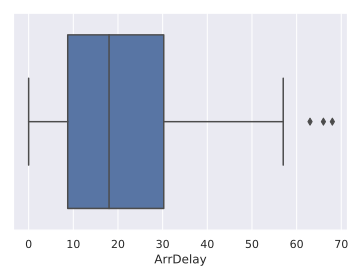

In [40]:
sns.boxplot(x='ArrDelay',data = t)